# Dependencies

In [453]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import json
from functools import partial
from collections import Counter
import wordcloud
from joblib import dump

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

# Loading Data

In [355]:
movies_df = pd.read_csv('Data/tmdb_5000_movies.csv')
credits_df = pd.read_csv('Data/tmdb_5000_credits.csv')

In [356]:
movies_df.head()

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   
3  [{"id": 849, "name": "dc comics"}, {"id": 853,...                en   
4  [{"id": 818, "name": "based on novel"}, {"id":...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   
2  A cryptic message from Bond’s past sends him o...  107.376788   
3  Following the death of District Attorney Harve...  112.312950   
4  John Carter is a war-weary, former military ca...   43.926995   

                                production_companies  \
0  [{"name": "Ingenious Film Partners", "id": 289...   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...   
2  [{"name": "Columbia Pictures", "id": 5}, {"nam...   
3  [{"name": "Legendary Pictures", "id": 923}, {"...   
4        [{"name": "Walt Disney Pictures", "id": 2}]   

                                production_countries release_date     revenue  \
0  [{"iso_3166_1": "US", "name": "United States o...   2009-12-10  2787965087   
1  [{"iso_3166_1": "US", "name": "United States o...   2007-05-19   961000000   
2  [{"iso_3166_1": "GB", "name": "United Kingdom"...   2015-10-26   880674609   
3  [{"iso_3166_1": "US", "name": "United States o...   2012-07-16  1084939099   
4  [{"iso_3166_1": "US", "name": "United States o...   2012-03-07   284139100   

   runtime                                   spoken_languages    status  \
0    162.0  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
1    169.0           [{"iso_639_1": "en", "name": "English"}]  Released   
2    148.0  [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...  Released   
3    165.0           [{"iso_639_1": "en", "name": "English"}]  Released   
4    132.0           [{"iso_639_1": "en", "name": "English"}]  Released   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   
2                           A Plan No One Escapes   
3                                 The Legend Ends   
4            Lost in our world, found in another.   

                                      title  vote_average  vote_count  
0                                    Avatar           7.2       11800  
1  Pirates of the Caribbean: At World's End           6.9        4500  
2                                   Spectre           6.3        4466  
3                     The Dark Knight Rises           7.6        9106  
4                               John Carter           6.1        2124

In [357]:
credits_df.head()

movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   
2    206647                                   Spectre   
3     49026                     The Dark Knight Rises   
4     49529                               John Carter   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   
3  [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
4  [{"cast_id": 5, "character": "John Carter", "c...   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  
2  [{"credit_id": "54805967c3a36829b5002c41", "de...  
3  [{"credit_id": "52fe4781c3a36847f81398c3", "de...  
4  [{"credit_id": "52fe479ac3a36847f813eaa3", "de...

# Data Cleaning & Preperation

In [358]:
credits_df.columns = ['id','tittle','cast','crew']
df = movies_df.merge(credits_df, on='id')

In [359]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [360]:
df.isna().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
tittle                     0
cast                       0
crew                       0
dtype: int64

## Data Type Conversion

In [361]:
# convert date appropriate format
df["release_date"] = pd.to_datetime(df['release_date'])
df['release_year'] = df['release_date'].dt.year
df['release_month'] = df['release_date'].dt.month_name()
del df["release_date"]

## Json Column Conversions

In [362]:
json_columns = {'cast', 'crew', 'genres', 'keywords', 'production_countries', 
                'production_companies', 'spoken_languages'}

for c in json_columns:
    df[c] = df[c].apply(json.loads)
    if c != "crew": # We need other information besides the name
        df[c] = df[c].apply(lambda row: [x["name"] for x in row])

## Director, Writer, Producer Columns

In [363]:
def get_job(job, row):
    person_name = [x['name'] for x in row if x['job']==job] 
    return person_name[0] if len(person_name) else np.nan

df["director"] = df["crew"].apply(partial(get_job, "Director"))
df["writer"]   = df["crew"].apply(partial(get_job, "Writer"))
df["producer"] = df["crew"].apply(partial(get_job, "Producer"))
del df["crew"]

# create profit column
df["profit"] = df["revenue"] - df["budget"]

In [364]:
df.head()

budget                                         genres  \
0  237000000  [Action, Adventure, Fantasy, Science Fiction]   
1  300000000                   [Adventure, Fantasy, Action]   
2  245000000                     [Action, Adventure, Crime]   
3  250000000               [Action, Crime, Drama, Thriller]   
4  260000000           [Action, Adventure, Science Fiction]   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [culture clash, future, space war, space colon...                en   
1  [ocean, drug abuse, exotic island, east india ...                en   
2  [spy, based on novel, secret agent, sequel, mi...                en   
3  [dc comics, crime fighter, terrorist, secret i...                en   
4  [based on novel, mars, medallion, space travel...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   
2  A cryptic message from Bond’s past sends him o...  107.376788   
3  Following the death of District Attorney Harve...  112.312950   
4  John Carter is a war-weary, former military ca...   43.926995   

                                production_companies  ... vote_average  \
0  [Ingenious Film Partners, Twentieth Century Fo...  ...          7.2   
1  [Walt Disney Pictures, Jerry Bruckheimer Films...  ...          6.9   
2                   [Columbia Pictures, Danjaq, B24]  ...          6.3   
3  [Legendary Pictures, Warner Bros., DC Entertai...  ...          7.6   
4                             [Walt Disney Pictures]  ...          6.1   

   vote_count                                    tittle  \
0       11800                                    Avatar   
1        4500  Pirates of the Caribbean: At World's End   
2        4466                                   Spectre   
3        9106                     The Dark Knight Rises   
4        2124                               John Carter   

                                                cast release_year  \
0  [Sam Worthington, Zoe Saldana, Sigourney Weave...       2009.0   
1  [Johnny Depp, Orlando Bloom, Keira Knightley, ...       2007.0   
2  [Daniel Craig, Christoph Waltz, Léa Seydoux, R...       2015.0   
3  [Christian Bale, Michael Caine, Gary Oldman, A...       2012.0   
4  [Taylor Kitsch, Lynn Collins, Samantha Morton,...       2012.0   

  release_month           director         writer           producer  \
0      December      James Cameron  James Cameron      James Cameron   
1           May     Gore Verbinski            NaN  Jerry Bruckheimer   
2       October         Sam Mendes            NaN   Barbara Broccoli   
3          July  Christopher Nolan            NaN      Charles Roven   
4         March     Andrew Stanton            NaN       Colin Wilson   

       profit  
0  2550965087  
1   661000000  
2   635674609  
3   834939099  
4    24139100  

[5 rows x 27 columns]

## Handling Missing Values

In [365]:
df.isna().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
tittle                     0
cast                       0
release_year               1
release_month              1
director                  30
writer                  3252
producer                1023
profit                     0
dtype: int64

### homepage : DROP COLUMN

In [366]:
df.drop(columns=['homepage'], inplace=True)

In [367]:
df.isna().sum()

budget                     0
genres                     0
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
tittle                     0
cast                       0
release_year               1
release_month              1
director                  30
writer                  3252
producer                1023
profit                     0
dtype: int64

In [368]:
df.shape

(4803, 26)

### runtime, release_yaer, release_month : MODE

In [369]:
for col in ["runtime", "release_year", "release_month"]:
    df[col] = df[col].fillna(df[col].mode().iloc[0])

In [370]:
df.isna().sum()

budget                     0
genres                     0
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
revenue                    0
runtime                    0
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
tittle                     0
cast                       0
release_year               0
release_month              0
director                  30
writer                  3252
producer                1023
profit                     0
dtype: int64

# Exploratory Data Analysis (EDA)

## Top 10 Movies by Revenue, Budget, Profit, Vote Average, Vote Count, Popularity

In [371]:
top_10_revenue = df.sort_values(by='revenue', ascending=False)[['title', 'revenue']][:10]
top_10_budget = df.sort_values(by='budget', ascending=False)[['title', 'budget']][:10]
top_10_profit = df.sort_values(by='profit', ascending=False)[['title', 'profit']][:10]
top_10_vote_average = df.sort_values(by='vote_average', ascending=False)[['title', 'vote_average']][:10]
top_10_vote_count = df.sort_values(by='vote_count', ascending=False)[['title', 'vote_count']][:10]
top_10_popularity = df.sort_values(by='popularity', ascending=False)[['title', 'popularity']][:10]

In [372]:
# sns.set(style="whitegrid")
# fig, ax = plt.subplots(figsize=(14, 8))

# # Creating the bar plot
# barplot = sns.barplot(x="title", y="revenue", data=top_10_revenue, palette="viridis", edgecolor=".2")

# ax.set_title('Top 10 Movies by Revenue', fontsize=20, pad=20)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=12)
# ax.set_ylabel('')  # Removes the y-axis label
# ax.set_xlabel('Movie Title', fontsize=15)
# ax.set_yticklabels('')

# # Looping over the bars and adding a text label of the revenue on top of each bar
# for p in barplot.patches:
#     barplot.annotate(format(p.get_height(), '.1f'),  # Format the number to a one decimal place
#                      (p.get_x() + p.get_width() / 2., p.get_height()),  # Position for the text
#                      ha = 'center', va = 'center', 
#                      size=10,
#                      xytext = (0, 9),  # The position of text (0,9) pixels above the bar
#                      textcoords = 'offset points')

# sns.despine(trim=True)  # Removes the top and right border
# plt.tight_layout()
# plt.show()

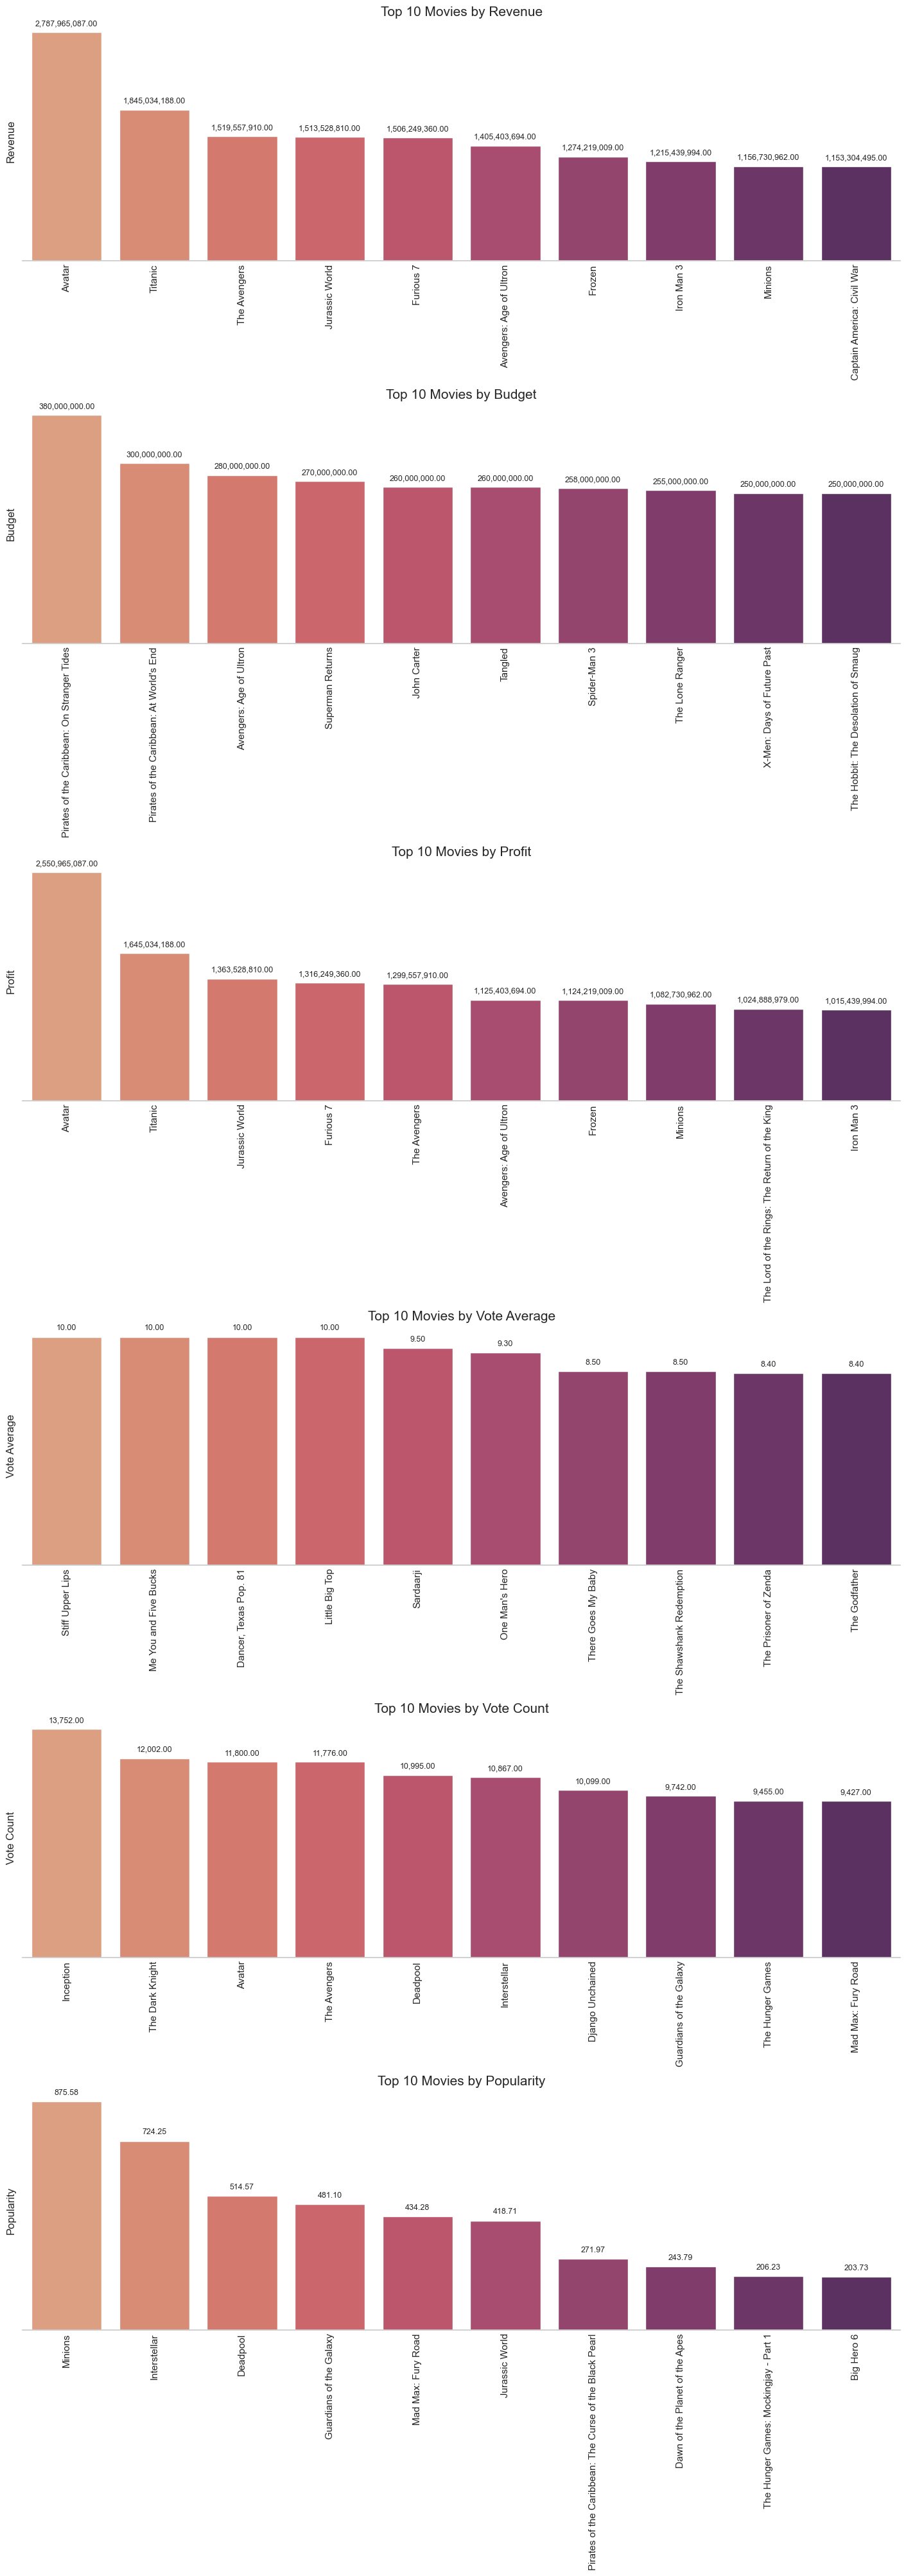

In [373]:
# Create a list of dataframes and their corresponding labels for easier iteration
dataframes = [top_10_revenue, top_10_budget, top_10_profit, top_10_vote_average, top_10_vote_count, top_10_popularity]
labels = ['Revenue', 'Budget', 'Profit', 'Vote Average', 'Vote Count', 'Popularity']

# Set up the matplotlib figure
sns.set(style="whitegrid")
fig, axs = plt.subplots(nrows=6, ncols=1, figsize=(14, 40), constrained_layout=True)

# Loop through each metric and create a subplot
for ax, dataframe, label in zip(axs, dataframes, labels):
    sns.barplot(ax=ax, x="title", y=dataframe.columns[-1], data=dataframe, palette="flare")
    ax.set_title(f'Top 10 Movies by {label}', fontsize=15)
    ax.set_xlabel('')
    ax.set_ylabel(label, fontsize=12)
    ax.set_yticklabels('')
    ax.tick_params(length=0)
    ax.tick_params(axis='x', rotation=90)
    ax.tick_params(axis='y', labelsize=10)
    ax.grid('')
    ax.spines[['right', 'left', 'top']].set_visible(False)
    # Annotate bars with the metric value
    for p in ax.patches:
        ax.annotate(f'{p.get_height():,.2f}',  # Add a comma as a thousand separator
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    fontsize=9, xytext=(0, 10), 
                    textcoords='offset points')

plt.show()

In [374]:
df

budget                                         genres      id  \
0     237000000  [Action, Adventure, Fantasy, Science Fiction]   19995   
1     300000000                   [Adventure, Fantasy, Action]     285   
2     245000000                     [Action, Adventure, Crime]  206647   
3     250000000               [Action, Crime, Drama, Thriller]   49026   
4     260000000           [Action, Adventure, Science Fiction]   49529   
...         ...                                            ...     ...   
4798     220000                      [Action, Crime, Thriller]    9367   
4799       9000                              [Comedy, Romance]   72766   
4800          0             [Comedy, Drama, Romance, TV Movie]  231617   
4801          0                                             []  126186   
4802          0                                  [Documentary]   25975   

                                               keywords original_language  \
0     [culture clash, future, space war, space colon...                en   
1     [ocean, drug abuse, exotic island, east india ...                en   
2     [spy, based on novel, secret agent, sequel, mi...                en   
3     [dc comics, crime fighter, terrorist, secret i...                en   
4     [based on novel, mars, medallion, space travel...                en   
...                                                 ...               ...   
4798  [united states–mexico barrier, legs, arms, pap...                es   
4799                                                 []                en   
4800  [date, love at first sight, narration, investi...                en   
4801                                                 []                en   
4802          [obsession, camcorder, crush, dream girl]                en   

                                original_title  \
0                                       Avatar   
1     Pirates of the Caribbean: At World's End   
2                                      Spectre   
3                        The Dark Knight Rises   
4                                  John Carter   
...                                        ...   
4798                               El Mariachi   
4799                                 Newlyweds   
4800                 Signed, Sealed, Delivered   
4801                          Shanghai Calling   
4802                         My Date with Drew   

                                               overview  popularity  \
0     In the 22nd century, a paraplegic Marine is di...  150.437577   
1     Captain Barbossa, long believed to be dead, ha...  139.082615   
2     A cryptic message from Bond’s past sends him o...  107.376788   
3     Following the death of District Attorney Harve...  112.312950   
4     John Carter is a war-weary, former military ca...   43.926995   
...                                                 ...         ...   
4798  El Mariachi just wants to play his guitar and ...   14.269792   
4799  A newlywed couple's honeymoon is upended by th...    0.642552   
4800  "Signed, Sealed, Delivered" introduces a dedic...    1.444476   
4801  When ambitious New York attorney Sam is sent t...    0.857008   
4802  Ever since the second grade when he first saw ...    1.929883   

                                   production_companies  \
0     [Ingenious Film Partners, Twentieth Century Fo...   
1     [Walt Disney Pictures, Jerry Bruckheimer Films...   
2                      [Columbia Pictures, Danjaq, B24]   
3     [Legendary Pictures, Warner Bros., DC Entertai...   
4                                [Walt Disney Pictures]   
...                                                 ...   
4798                                [Columbia Pictures]   
4799                                                 []   
4800  [Front Street Pictures, Muse Entertainment Ent...   
4801                                                 []   
4802       [rusty bear entertainment, lucky crow films]   

                            prod

In [375]:
df.isna().sum()

budget                     0
genres                     0
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
revenue                    0
runtime                    0
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
tittle                     0
cast                       0
release_year               0
release_month              0
director                  30
writer                  3252
producer                1023
profit                     0
dtype: int64

## Genres

In [376]:
genres_flatten = sum(df["genres"].values, []) # genres are list of lists
genres_info = Counter(genres_flatten)

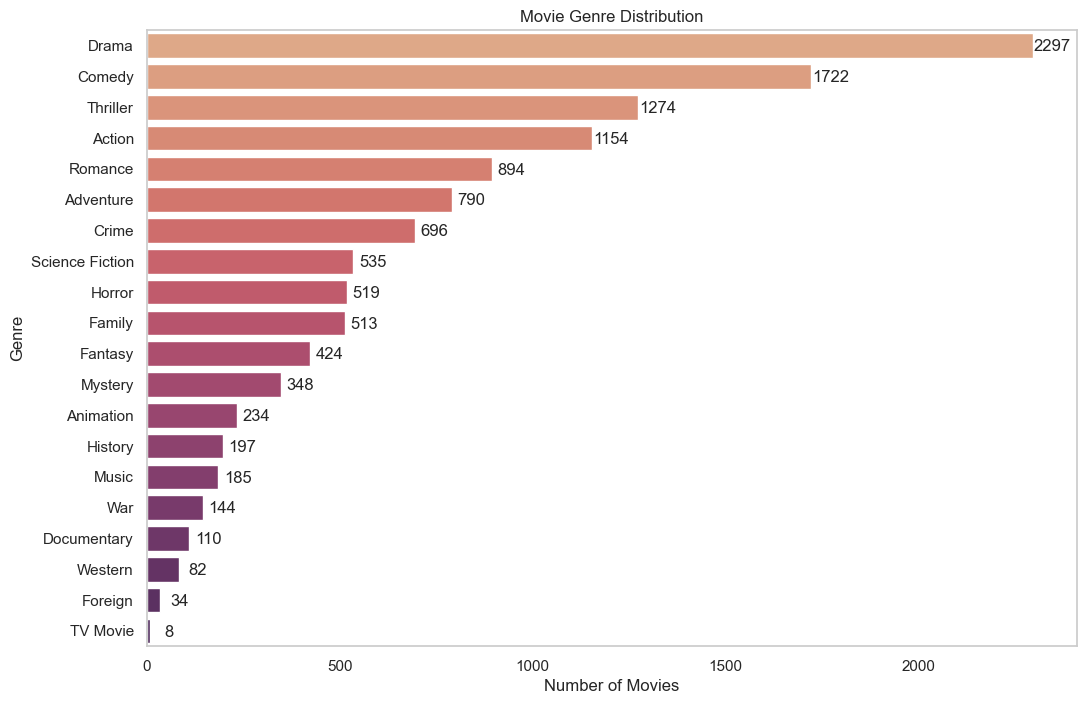

In [377]:
# Convert Counter to a DataFrame for easier plotting
genres_df = pd.DataFrame(genres_info.items(), columns=['Genre', 'Count']).sort_values('Count', ascending=False)

# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Count', y='Genre', data=genres_df, palette='flare')

plt.title('Movie Genre Distribution')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.grid(False)
# Annotate each bar with the count value, adjusting the position further to the right
for p in barplot.patches:
    width = p.get_width()
    plt.text(width + 50,  # Increase the offset here
             p.get_y() + 0.55 * p.get_height(),
             '{:1.0f}'.format(width),
             ha='center', va='center')

plt.show()

## Keywords

In [378]:
keywords_flatten = sum(df["keywords"].values, []) # keywords are list of lists
keywords_info = Counter(keywords_flatten)

In [379]:
keywords_info

Counter({'woman director': 324,
         'independent film': 318,
         'duringcreditsstinger': 307,
         'based on novel': 197,
         'murder': 189,
         'aftercreditsstinger': 170,
         'violence': 150,
         'dystopia': 139,
         'sport': 126,
         'revenge': 118,
         'sex': 111,
         'friendship': 106,
         'musical': 105,
         'biography': 105,
         'teenager': 99,
         '3d': 98,
         'love': 95,
         'sequel': 94,
         'suspense': 92,
         'new york': 89,
         'police': 84,
         'los angeles': 81,
         'high school': 80,
         'alien': 76,
         'prison': 72,
         'nudity': 71,
         'superhero': 69,
         'family': 69,
         'london england': 69,
         'drug': 69,
         'dying and death': 66,
         'father son relationship': 65,
         'daughter': 61,
         'world war ii': 58,
         'kidnapping': 57,
         'wedding': 57,
         'remake': 56,
         'suicid

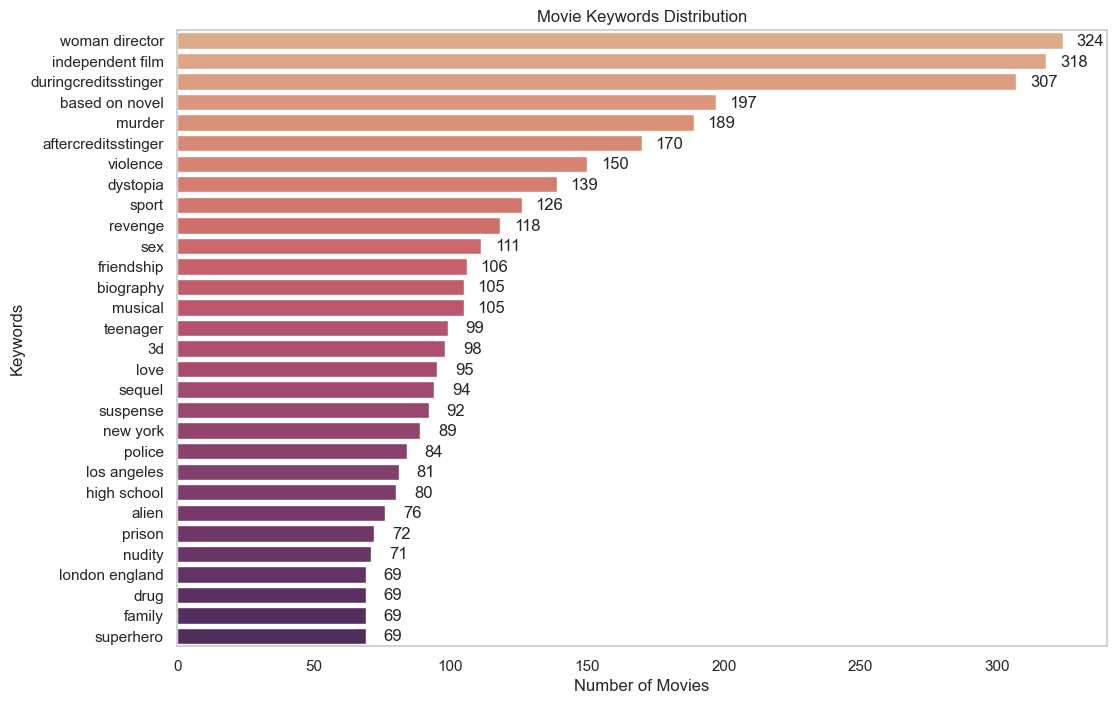

In [380]:
# Convert Counter to a DataFrame for easier plotting
keywords_df = pd.DataFrame(keywords_info.items(), columns=['Genre', 'Count']).sort_values('Count', ascending=False)

# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Count', y='Genre', data=keywords_df.head(30), palette='flare')

plt.title('Movie Keywords Distribution')
plt.xlabel('Number of Movies')
plt.ylabel('Keywords')
plt.grid(False)
# Annotate each bar with the count value, adjusting the position further to the right
for p in barplot.patches:
    width = p.get_width()
    plt.text(width + 10,  # Increase the offset here
             p.get_y() + 0.55 * p.get_height(),
             '{:1.0f}'.format(width),
             ha='center', va='center')

plt.show()

## Original Language

In [381]:
origin_language = df.groupby('original_language')['original_language'].count().sort_values(ascending=False)

In [382]:
origin_language

original_language
en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
fa       4
nl       4
he       3
th       3
ar       2
ta       2
id       2
ro       2
cs       2
sl       1
te       1
tr       1
vi       1
xx       1
ps       1
pl       1
no       1
nb       1
ky       1
el       1
is       1
hu       1
af       1
Name: original_language, dtype: int64

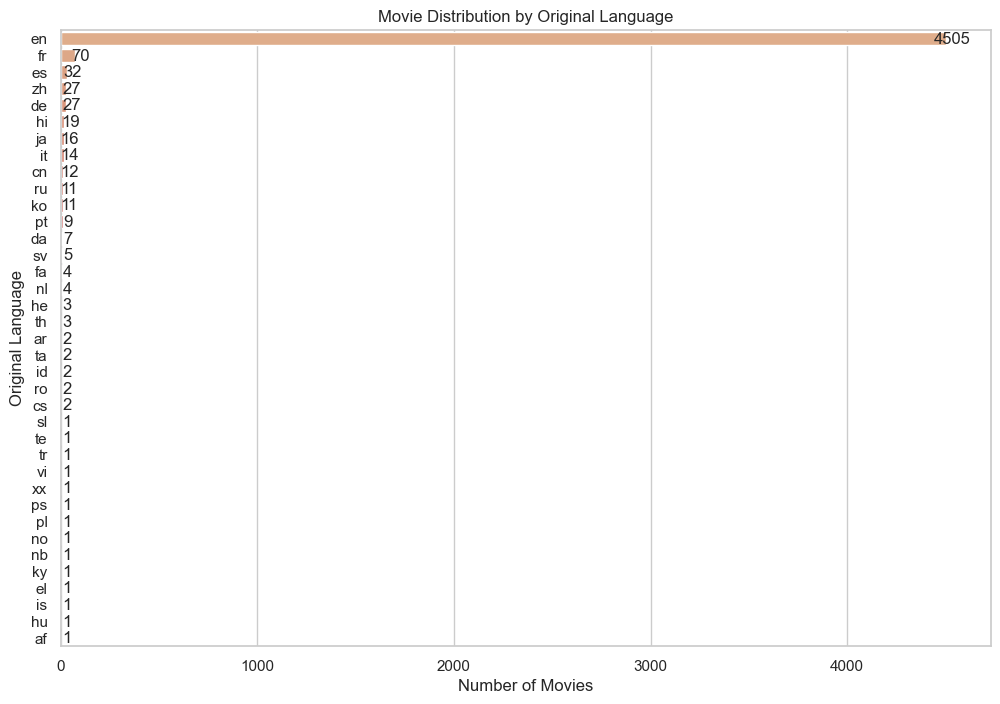

In [383]:
languages_df = origin_language.reset_index(name='Count')
languages_df.columns = ['Language', 'Count']

# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Count', y='Language', data=languages_df, palette='flare')

plt.title('Movie Distribution by Original Language')
plt.xlabel('Number of Movies')
plt.ylabel('Original Language')

# Annotate each bar with the count value, adjusting the position further to the right
for p in barplot.patches:
    width = p.get_width()
    plt.text(width + 30,  # Adjust this value to move the text more to the right
             p.get_y() + 0.55 * p.get_height(),
             '{:1.0f}'.format(width),
             ha='center', va='center')

plt.show()

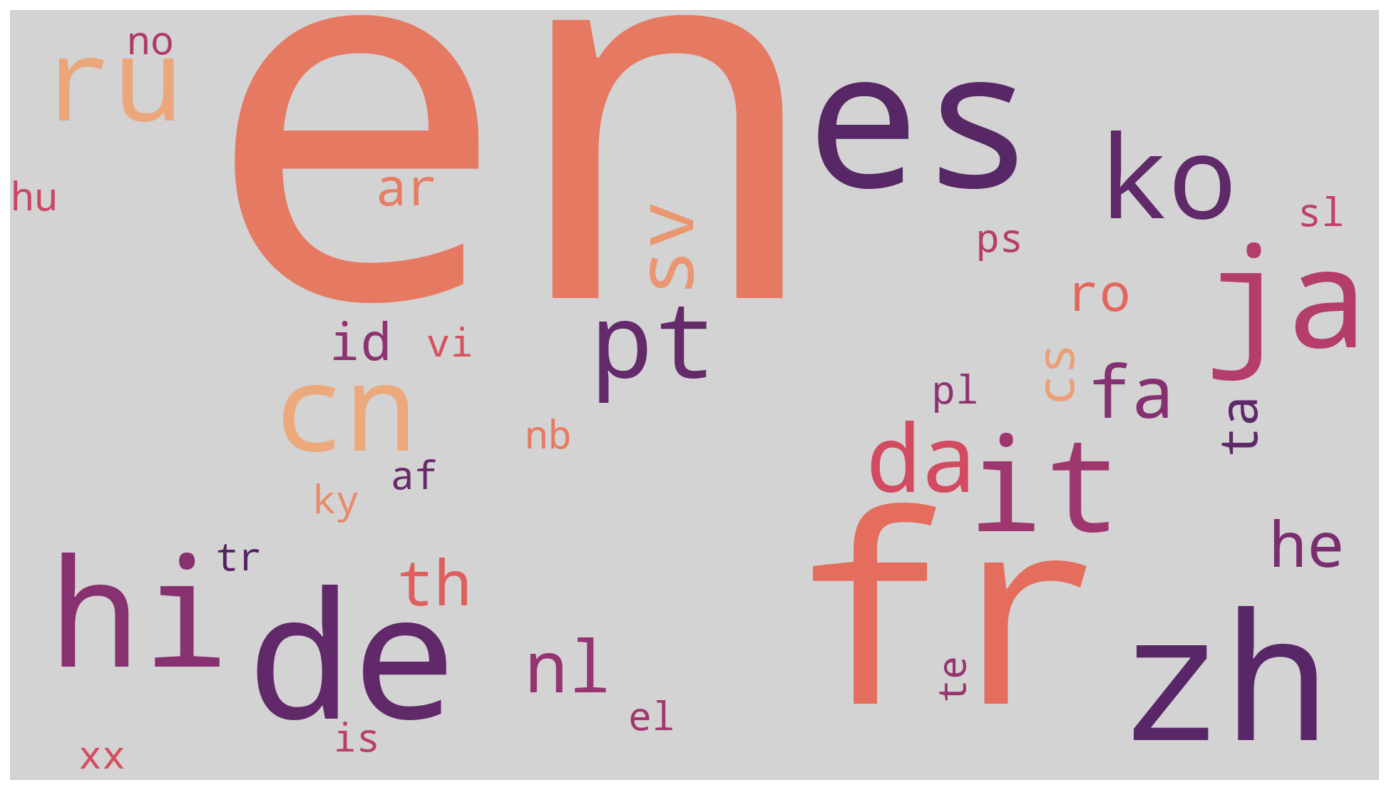

In [384]:
language_dict = origin_language.to_dict()

# Create a word cloud from the dictionary
wordcloud_plt = wordcloud.WordCloud(width=1920, height=1080, background_color='lightgray', colormap='flare').generate_from_frequencies(language_dict)

# Display the generated image:
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud_plt, interpolation='bilinear')
plt.axis('off')  # Remove the axis
plt.show()

## Overview

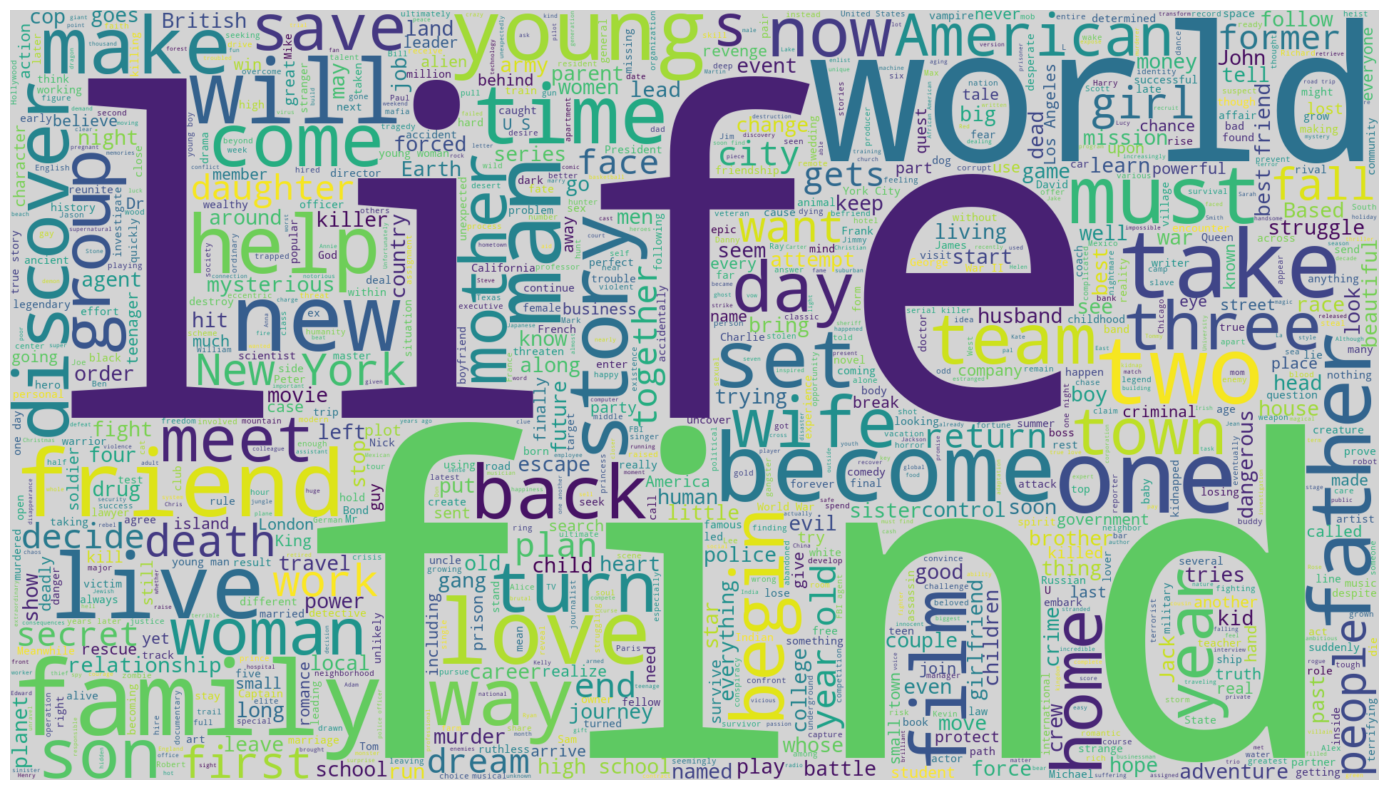

In [385]:
# Combine all movie descriptions into one large text string
text = " ".join(overview for overview in df['overview'].dropna())

# Create and generate a word cloud image
wordcloud_overview = wordcloud.WordCloud(background_color="lightgray", max_words=1000, contour_width=3, contour_color='flare', width=1920, height=1080).generate(text)

# Display the generated image using matplotlib
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud_overview, interpolation='bilinear')
plt.axis("off")  # Don't show axis to make it visually clean
plt.show()

## Production Company

In [386]:
production_companies_flatten = sum(df["production_companies"].values, []) # production_companies are list of lists
production_companies_info = Counter(production_companies_flatten)

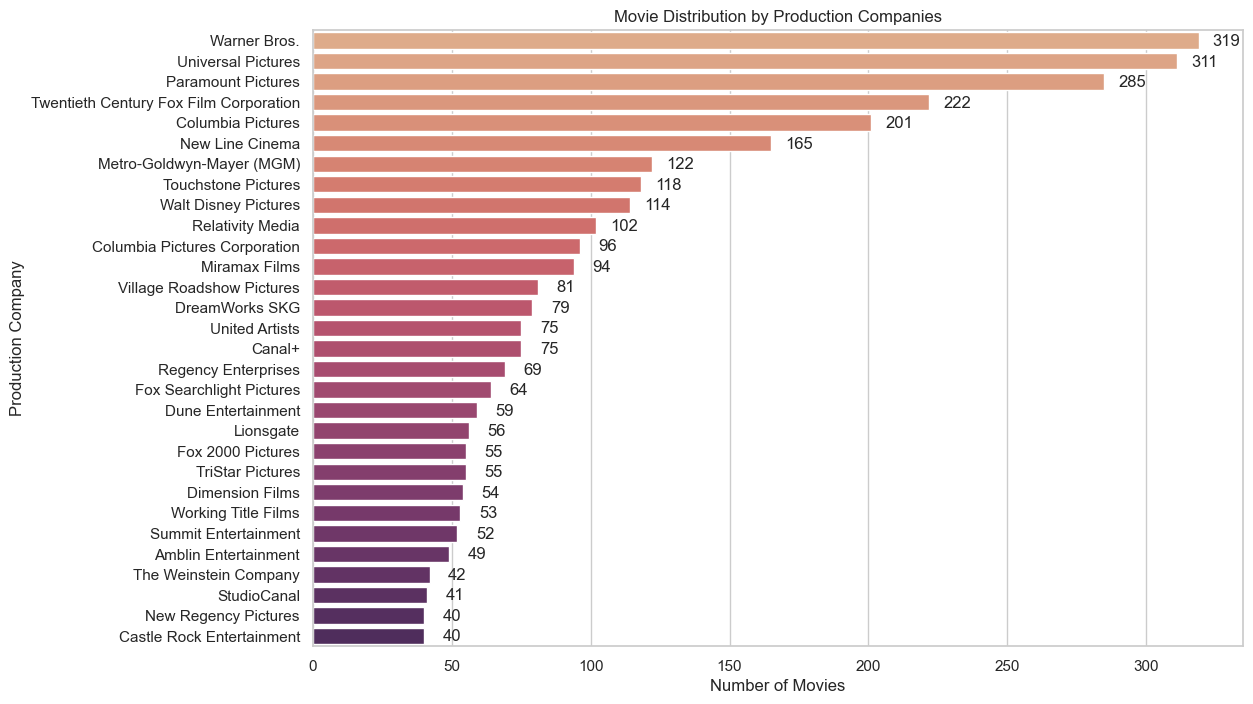

In [387]:
production_companies_df = pd.DataFrame(production_companies_info.items(), columns=['Production Company', 'Count']).sort_values('Count', ascending=False)


# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Count', y='Production Company', data=production_companies_df.head(30), palette='flare')

plt.title('Movie Distribution by Production Companies')
plt.xlabel('Number of Movies')
plt.ylabel('Production Company')

# Annotate each bar with the count value, adjusting the position further to the right
for p in barplot.patches:
    width = p.get_width()
    plt.text(width + 10,  # Adjust this value to move the text more to the right
             p.get_y() + 0.55 * p.get_height(),
             '{:1.0f}'.format(width),
             ha='center', va='center')

plt.show()

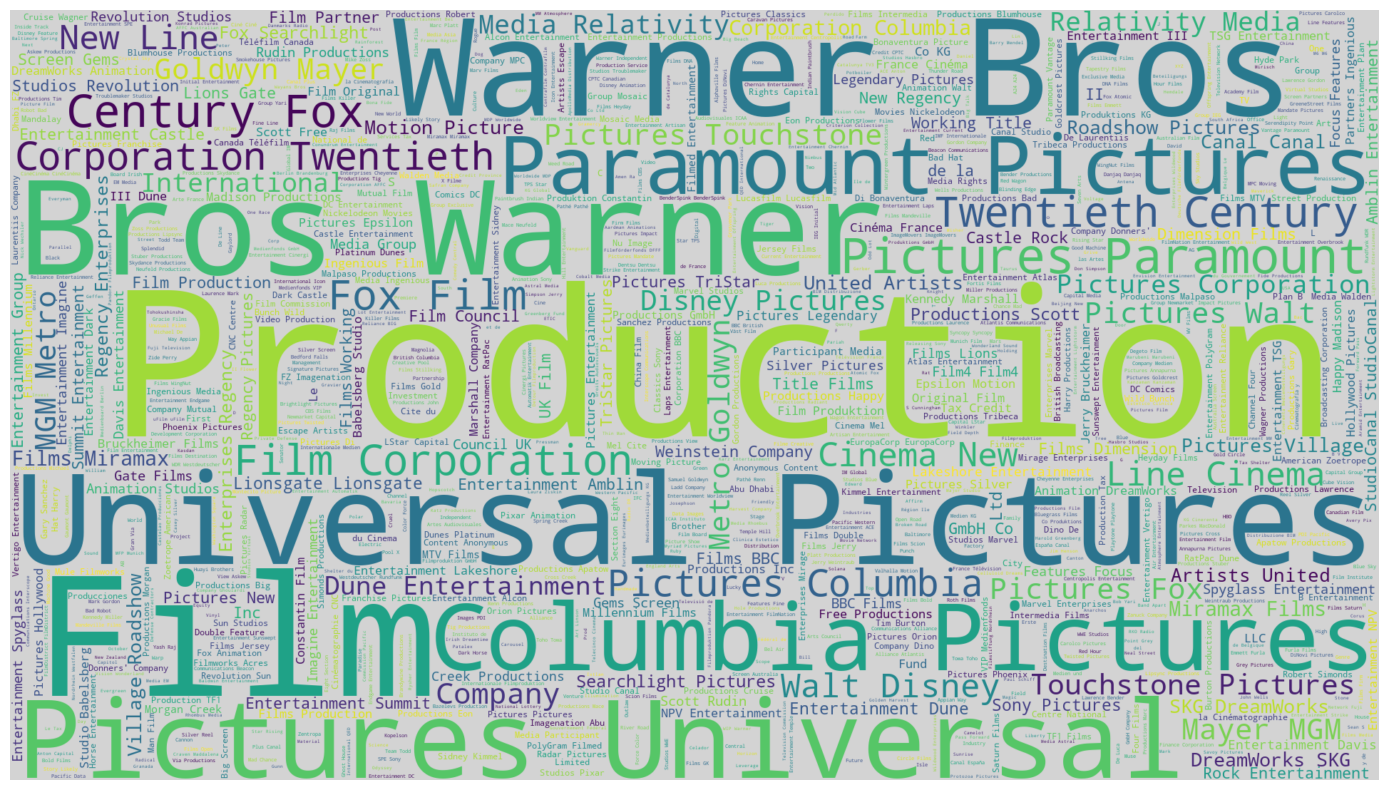

In [388]:
# Prepare a text string with each production company repeated by its count
text = ' '.join([f"{company} " * count for company, count in production_companies_info.items()])

# Generate the word cloud
wordcloud_production_companies = wordcloud.WordCloud(background_color="lightgray", max_words=1000, contour_width=3, contour_color='flare', width=1920, height=1080).generate(text)

# Display the generated word cloud
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud_production_companies, interpolation='bilinear')
plt.axis("off")  # Hide the axes
plt.show()

## Production Countries

In [389]:
production_countries_flatten = sum(df["production_countries"].values, []) # production_countries are list of lists
production_countries_info = Counter(production_countries_flatten)

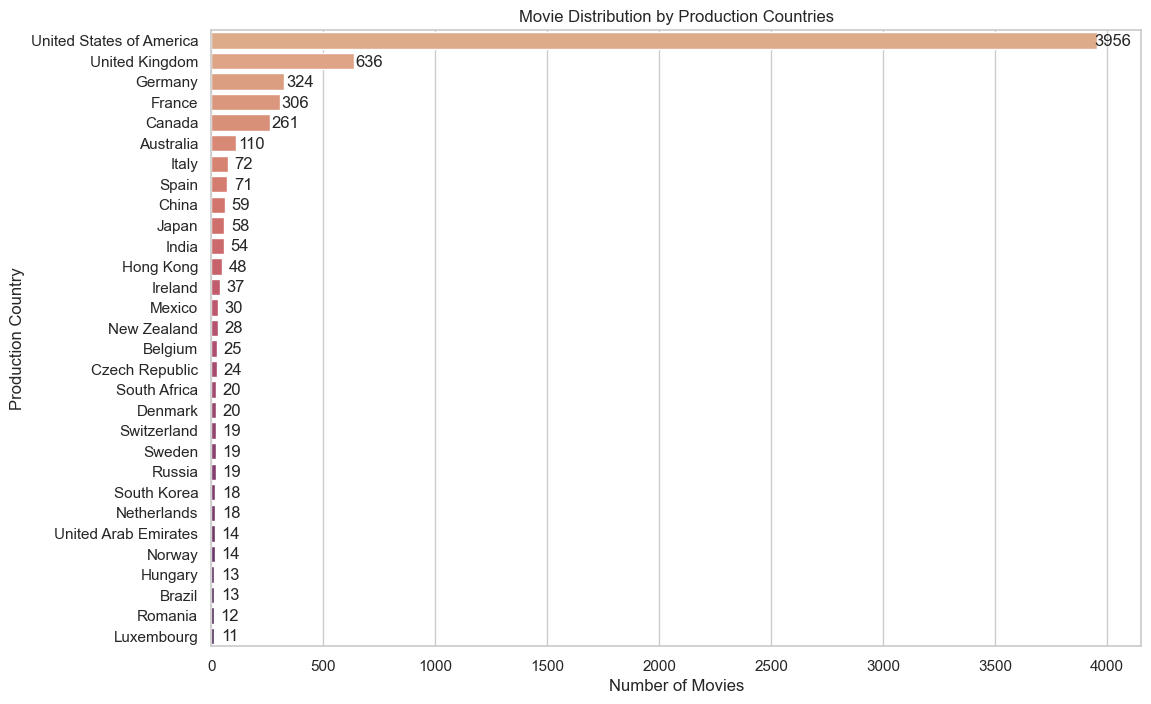

In [390]:
production_countries_df = pd.DataFrame(production_countries_info.items(), columns=['Production Country', 'Count']).sort_values('Count', ascending=False)


# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Count', y='Production Country', data=production_countries_df.head(30), palette='flare')

plt.title('Movie Distribution by Production Countries')
plt.xlabel('Number of Movies')
plt.ylabel('Production Country')

# Annotate each bar with the count value, adjusting the position further to the right
for p in barplot.patches:
    width = p.get_width()
    plt.text(width + 70,  # Adjust this value to move the text more to the right
             p.get_y() + 0.55 * p.get_height(),
             '{:1.0f}'.format(width),
             ha='center', va='center')

plt.show()

In [391]:
df.to_csv('denormal_df.csv')

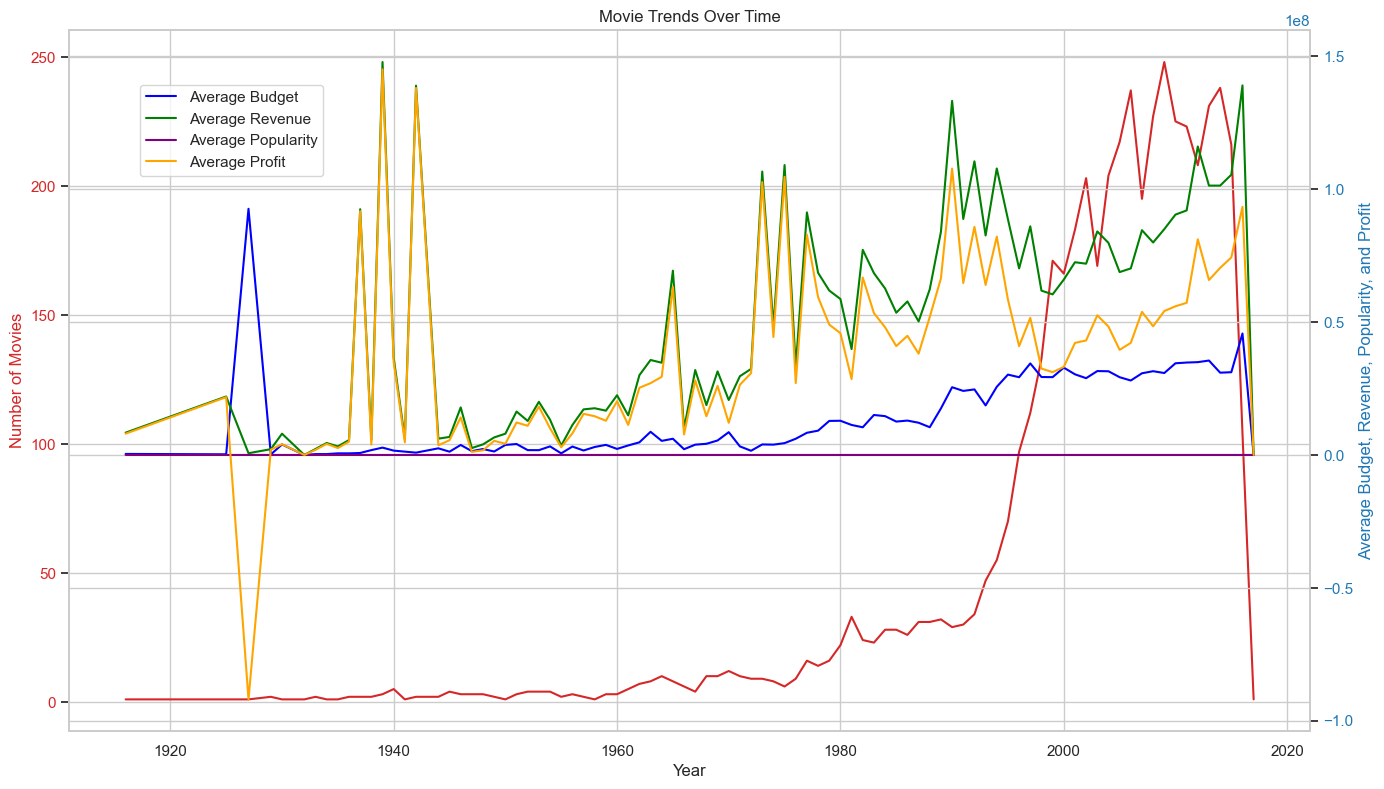

In [393]:
# average budgets, revenues, and popularity.
# Grouping the data by release year for analysis
time_series_data = df.groupby('release_year').agg({
    'id': 'count',
    'budget': 'mean',
    'revenue': 'mean',
    'popularity': 'mean',
    'profit': 'mean'
}).reset_index()

# Renaming the 'id' column to 'movie_count' to better reflect its meaning
time_series_data.rename(columns={'id': 'movie_count'}, inplace=True)

# Plotting trends over time
fig, ax1 = plt.subplots(figsize=(14, 8))

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Movies', color=color)
ax1.plot(time_series_data['release_year'], time_series_data['movie_count'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Average Budget, Revenue, Popularity, and Profit', color=color)  # we already handled the x-label with ax1
ax2.plot(time_series_data['release_year'], time_series_data['budget'], color='blue', label='Average Budget')
ax2.plot(time_series_data['release_year'], time_series_data['revenue'], color='green', label='Average Revenue')
ax2.plot(time_series_data['release_year'], time_series_data['popularity'], color='purple', label='Average Popularity')
ax2.plot(time_series_data['release_year'], time_series_data['profit'], color='orange', label='Average Profit')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.legend(loc="upper left", bbox_to_anchor=(0.1,0.9))
plt.title('Movie Trends Over Time')
plt.show()


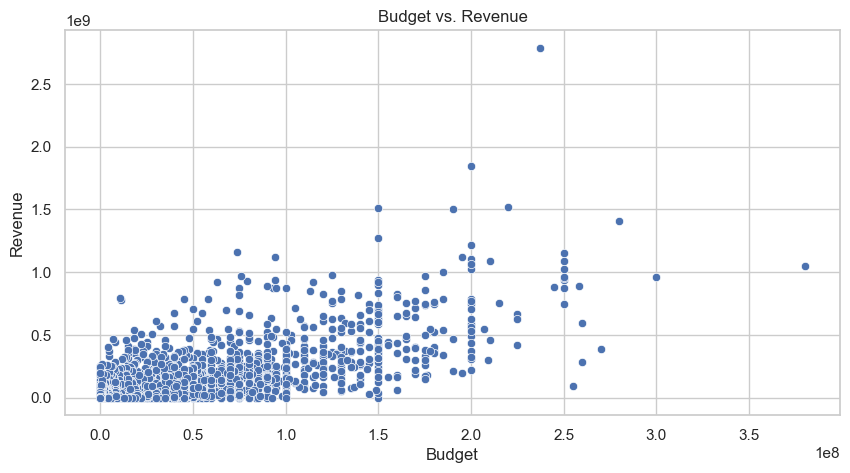

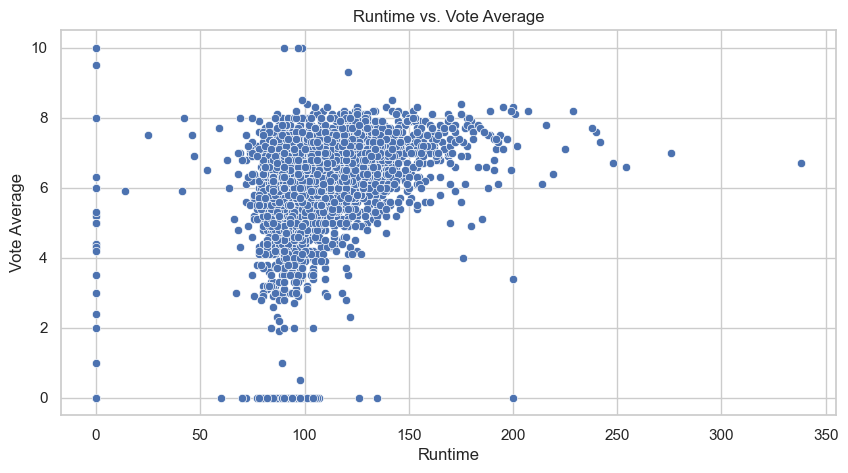

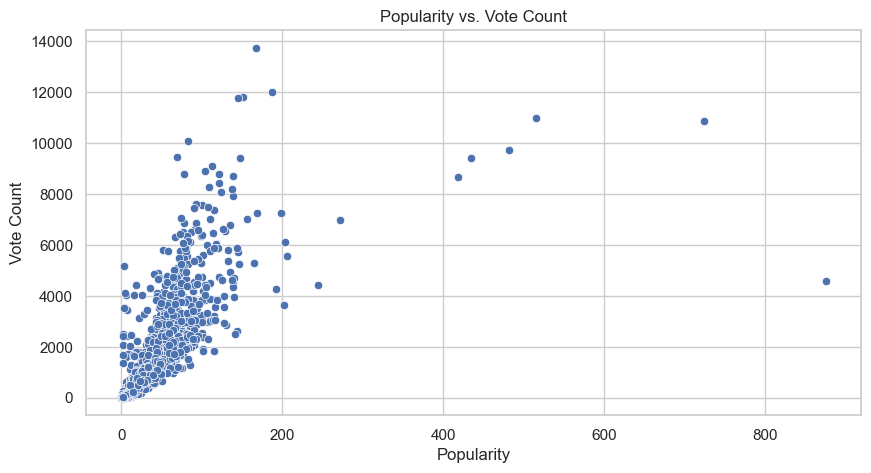

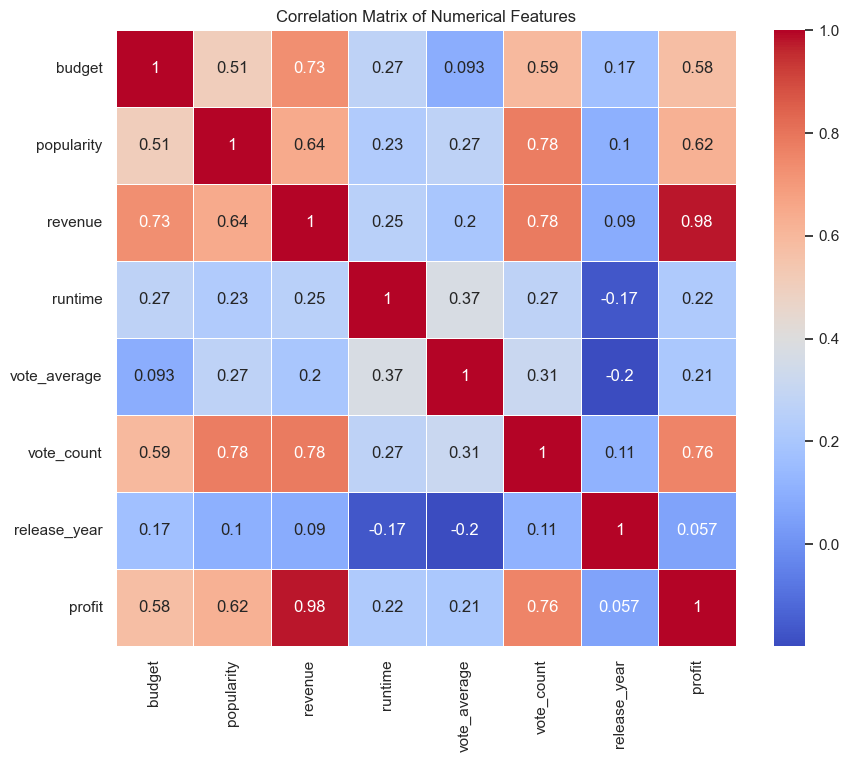

In [394]:
# 1. Correlation Matrix for Numerical Features
correlation_matrix = df[numerical_features].corr()

# 2. Budget vs. Revenue
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='budget', y='revenue')
plt.title('Budget vs. Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

# 3. Runtime vs. Vote Average
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='runtime', y='vote_average')
plt.title('Runtime vs. Vote Average')
plt.xlabel('Runtime')
plt.ylabel('Vote Average')
plt.show()

# 4. Popularity vs. Vote Count
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='popularity', y='vote_count')
plt.title('Popularity vs. Vote Count')
plt.xlabel('Popularity')
plt.ylabel('Vote Count')
plt.show()

# Displaying the Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [395]:
correlation_matrix

budget  popularity   revenue   runtime  vote_average  \
budget        1.000000    0.505414  0.730823  0.269967      0.093146   
popularity    0.505414    1.000000  0.644724  0.225661      0.273952   
revenue       0.730823    0.644724  1.000000  0.251208      0.197150   
runtime       0.269967    0.225661  0.251208  1.000000      0.374581   
vote_average  0.093146    0.273952  0.197150  0.374581      1.000000   
vote_count    0.593180    0.778130  0.781487  0.272068      0.312997   
release_year  0.168899    0.101916  0.090131 -0.167233     -0.198513   
profit        0.575852    0.620854  0.978881  0.220032      0.208241   

              vote_count  release_year    profit  
budget          0.593180      0.168899  0.575852  
popularity      0.778130      0.101916  0.620854  
revenue         0.781487      0.090131  0.978881  
runtime         0.272068     -0.167233  0.220032  
vote_average    0.312997     -0.198513  0.208241  
vote_count      1.000000      0.114144  0.758379  
release_year    0.114144      1.000000  0.057371  
profit          0.758379      0.057371  1.000000

* **Budget and Revenue (0.73)**: There's a strong positive correlation between budget and revenue, suggesting that movies with higher budgets tend to generate higher revenues. This could be due to higher-budget movies being able to afford better production quality, more famous actors, and more extensive marketing campaigns.

* **Popularity and Revenue (0.64)**: A significant positive correlation indicates that more popular movies, as measured by the provided popularity metric, generally earn more revenue. This might encourage producers and marketers to invest in strategies that enhance a movie's popularity to improve its financial success.

* **Revenue and Profit (0.98)**: This very high correlation is expected since profit is directly calculated from revenue (revenue minus budget). It reaffirms the importance of maximizing revenue for higher profits.

* **Vote Count and Popularity (0.78)**: The strong positive correlation here suggests that movies that are more popular tend to receive more votes. This could be useful for identifying movies that will engage audiences, as higher engagement typically translates to both more votes and higher popularity.

* **Runtime and Vote Average (0.37)**: A moderate positive correlation here suggests that longer movies tend to have higher average votes, which could imply that audiences appreciate more comprehensive storytelling, assuming runtime contributes to that. However, this relationship isn't very strong, so it should be considered alongside other factors like genre and target audience.

* **Vote Count and Revenue (0.78)**: This strong correlation indicates that movies with more votes tend to earn more revenue. This might suggest that engaging movies that prompt viewers to vote also attract more viewers, contributing to higher box office sales.

In [396]:
# Create a new DataFrame that duplicates movies for each of their genres
expanded_genre_df = df.explode('genres')

# Calculate correlations by genre
genre_correlations = {}
unique_genres = expanded_genre_df['genres'].unique()

for genre in unique_genres:
    genre_df = expanded_genre_df[expanded_genre_df['genres'] == genre]
    correlation = genre_df[['budget', 'revenue']].corr().iloc[0, 1]  # Get the budget-revenue correlation
    genre_correlations[genre] = correlation

In [397]:
genre_correlations

{'Action': 0.7516577448090541,
 'Adventure': 0.7092856253202227,
 'Fantasy': 0.7269122613151144,
 'Science Fiction': 0.7226657323999093,
 'Crime': 0.7493277357308499,
 'Drama': 0.6550162542425393,
 'Thriller': 0.7210153076418995,
 'Animation': 0.6684704064113359,
 'Family': 0.7037673085311068,
 'Western': 0.5119374017179531,
 'Comedy': 0.6854272086281317,
 'Romance': 0.6022230445736688,
 'Horror': 0.576130747884941,
 'Mystery': 0.6799105714665283,
 'History': 0.5637031989643804,
 'War': 0.549455437358861,
 'Music': 0.6072282914095369,
 'Documentary': 0.31273163706901075,
 'Foreign': 0.009001371957617762,
 'TV Movie': nan,
 nan: nan}

**High Correlation Genres (Action, Adventure, Fantasy, Science Fiction, Crime)**: These genres show strong positive correlations (above 0.7) between budget and revenue, indicating that higher investments in production tend to result in higher revenues. This could be due to the fact that these genres often require significant budgets for special effects, sets, and action sequences that attract large audiences.

**Moderate to High Correlation Genres (Drama, Thriller, Animation, Family, Comedy, Romance, Mystery, Horror, History, War, Music)**: These genres have moderate to high correlations (ranging from around 0.55 to 0.68), suggesting a somewhat strong relationship between budget and revenue, but not as pronounced as in the first group. It indicates that while investment matters, other factors like storytelling, star power, and marketing might play a more significant role in determining their success.

**Low Correlation Genres (Documentary, Foreign)**: Documentaries and foreign films show low correlations between budget and revenue. For documentaries, this might reflect a genre where content and subject matter are more critical to success than production value. For foreign films, cultural differences and distribution challenges might weaken the relationship between investment and financial returns.

**Special Cases (TV Movie, NaN)**: The correlation for TV movies is not available (NaN), which could be due to insufficient data or the nature of TV movie production and distribution differing significantly from theatrical releases. The presence of NaN values requires further investigation to understand the underlying data.

# Predictive Model

In [398]:
df.head()

budget                                         genres      id  \
0  237000000  [Action, Adventure, Fantasy, Science Fiction]   19995   
1  300000000                   [Adventure, Fantasy, Action]     285   
2  245000000                     [Action, Adventure, Crime]  206647   
3  250000000               [Action, Crime, Drama, Thriller]   49026   
4  260000000           [Action, Adventure, Science Fiction]   49529   

                                            keywords original_language  \
0  [culture clash, future, space war, space colon...                en   
1  [ocean, drug abuse, exotic island, east india ...                en   
2  [spy, based on novel, secret agent, sequel, mi...                en   
3  [dc comics, crime fighter, terrorist, secret i...                en   
4  [based on novel, mars, medallion, space travel...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   
2  A cryptic message from Bond’s past sends him o...  107.376788   
3  Following the death of District Attorney Harve...  112.312950   
4  John Carter is a war-weary, former military ca...   43.926995   

                                production_companies  \
0  [Ingenious Film Partners, Twentieth Century Fo...   
1  [Walt Disney Pictures, Jerry Bruckheimer Films...   
2                   [Columbia Pictures, Danjaq, B24]   
3  [Legendary Pictures, Warner Bros., DC Entertai...   
4                             [Walt Disney Pictures]   

                         production_countries  ...  vote_average  vote_count  \
0  [United States of America, United Kingdom]  ...           7.2       11800   
1                  [United States of America]  ...           6.9        4500   
2  [United Kingdom, United States of America]  ...           6.3        4466   
3                  [United States of America]  ...           7.6        9106   
4                  [United States of America]  ...           6.1        2124   

                                     tittle  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                                cast release_year  \
0  [Sam Worthington, Zoe Saldana, Sigourney Weave...       2009.0   
1  [Johnny Depp, Orlando Bloom, Keira Knightley, ...       2007.0   
2  [Daniel Craig, Christoph Waltz, Léa Seydoux, R...       2015.0   
3  [Christian Bale, Michael Caine, Gary Oldman, A...       2012.0   
4  [Taylor Kitsch, Lynn Collins, Samantha Morton,...       2012.0   

  release_month           director         writer           producer  \
0      December      James Cameron  James Cameron      James Cameron   
1           May     Gore Verbinski            NaN  Jerry Bruckheimer   
2       October         Sam Mendes            NaN   Barbara Broccoli   
3          July  Christopher Nolan            NaN      Charles Roven   
4         March     Andrew Stanton            NaN       Colin Wilson   

       profit  
0  2550965087  
1   661000000  
2   635674609  
3   834939099  
4    24139100  

[5 rows x 26 columns]

## Dependencies

In [408]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report

## Data Preperation

In [400]:
# Define the target variable
df['is_profitable'] = df['profit'] > 0

# Preprocess Multi-Label Features
def preprocess_multilabel(df, column_name):
    unique_labels = set(label for row_labels in df[column_name].dropna() for label in row_labels)
    for label in unique_labels:
        df[f"{column_name}_{label}"] = df[column_name].apply(lambda x: int(label in x) if isinstance(x, list) else 0)

for column_name in ['genres', 'production_companies', 'production_countries']:
    preprocess_multilabel(df, column_name)

df.drop(['genres', 'production_companies', 'production_countries'], axis=1, inplace=True)

# Features list after preprocessing multi-label columns
features = ['budget', 'popularity', 'runtime', 'vote_average', 'vote_count'] + \
           [col for col in df.columns if 'genres_' in col or 'production_companies_' in col or 'production_countries_' in col]

# Preprocessing for numerical and remaining categorical features
numerical_features = ['budget', 'popularity', 'runtime', 'vote_average', 'vote_count']

# Creating a ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
    ])

X = df[features]
y = df['is_profitable']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Models

In [401]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

## Base Models Comparision

Results for Logistic Regression:
Accuracy: 0.7783558792924038
Precision: 0.8275862068965517
Recall: 0.7427466150870407
F1-Score: 0.7828746177370031
ROC-AUC: 0.8584130552215657

Results for Decision Tree:
Accuracy: 0.7221644120707597
Precision: 0.7306273062730627
Recall: 0.7659574468085106
F1-Score: 0.7478753541076487
ROC-AUC: 0.7185643089898409

Results for Random Forest:
Accuracy: 0.7929240374609782
Precision: 0.7988721804511278
Recall: 0.8220502901353965
F1-Score: 0.8102955195424214
ROC-AUC: 0.863860717584122

Results for XGBoost:
Accuracy: 0.7752341311134235
Precision: 0.7866666666666666
Recall: 0.7988394584139265
F1-Score: 0.7927063339731286
ROC-AUC: 0.8562043668426647



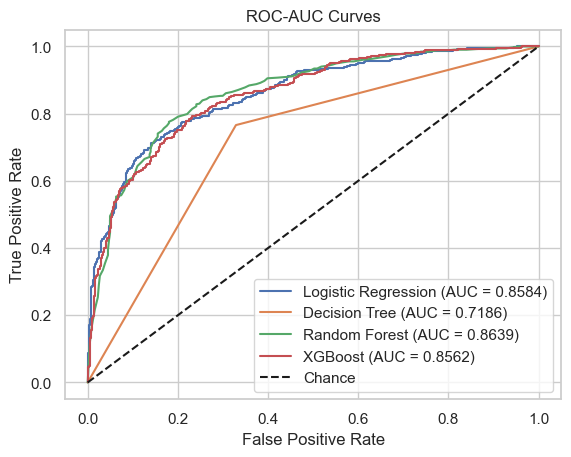

In [402]:
model_scores = {}

for model_name, model in models.items():
    
    # Create and fit the model pipeline
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', model)])
    clf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

    # Calculating metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    
    # Storing scores
    model_scores[model_name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1, 'ROC-AUC': roc_auc}
    
    # Evaluate the model
    print(f"Results for {model_name}:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1}")
    print(f"ROC-AUC: {roc_auc}\n")

    # ROC-AUC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc_score(y_test, y_proba):.4f})")

plt.plot([0, 1], [0, 1], 'k--', label="Chance")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curves')
plt.legend()
plt.show()

## Grid Search to find Best Hyper-Parameteres

In [405]:
# Define parameter grids for each model
param_grid = {
    'Logistic Regression': {
        'classifier__C': [0.1, 1, 10],
        'classifier__penalty': ['l2']
    },
    'Decision Tree': {
        'classifier__max_depth': [None, 10, 20],
        'classifier__min_samples_leaf': [1, 2, 4]
    },
    'Random Forest': {
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [None, 10, 20],
        'classifier__min_samples_leaf': [1, 2, 4]
    },
    'XGBoost': {
        'classifier__learning_rate': [0.01, 0.1],
        'classifier__max_depth': [3, 6],
        'classifier__n_estimators': [100, 200]
    }
}

# Storage for best models and scores
best_models = {}
best_scores = {}

for model_name, params in param_grid.items():
    print(f"Grid search for: {model_name}")
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', models[model_name])])

    # Setup grid search
    grid_search = GridSearchCV(clf, param_grid=params, cv=5, scoring='roc_auc', n_jobs=-1)
    
    # Perform grid search
    grid_search.fit(X_train, y_train)
    
    # Store the best model and its score
    best_models[model_name] = grid_search.best_estimator_
    best_scores[model_name] = grid_search.best_score_
    
    print(f"Best ROC-AUC for {model_name}: {grid_search.best_score_:.4f}")
    print(f"Best parameters: {grid_search.best_params_}\n")

# Compare models based on ROC-AUC score
best_auc_model = max(best_scores, key=best_scores.get)
print(f"Model with the best ROC-AUC score: {best_auc_model} - {best_scores[best_auc_model]:.4f}")

Grid search for: Logistic Regression
Best ROC-AUC for Logistic Regression: 0.8678
Best parameters: {'classifier__C': 10, 'classifier__penalty': 'l2'}

Grid search for: Decision Tree
Best ROC-AUC for Decision Tree: 0.8140
Best parameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 4}

Grid search for: Random Forest
Best ROC-AUC for Random Forest: 0.8773
Best parameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 4, 'classifier__n_estimators': 200}

Grid search for: XGBoost
Best ROC-AUC for XGBoost: 0.8804
Best parameters: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 100}

Model with the best ROC-AUC score: XGBoost - 0.8804


In [410]:
# Extended parameter grid for Random Forest
param_grid_rf = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__max_features': ['auto', 'sqrt']
}

clf_rf = Pipeline(steps=[('preprocessor', preprocessor),
                         ('classifier', RandomForestClassifier(random_state=42))])

grid_search_rf = GridSearchCV(clf_rf, param_grid=param_grid_rf, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)

print(f"Best ROC-AUC for Extended Random Forest: {grid_search_rf.best_score_:.4f}")
print(f"Best parameters: {grid_search_rf.best_params_}")


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


Best ROC-AUC for Extended Random Forest: 0.8776
Best parameters: {'classifier__max_depth': 10, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}


In [411]:
# Extended parameter grid for XGBoost
param_grid_xgb = {
    'classifier__learning_rate': [0.01, 0.05, 0.1],
    'classifier__max_depth': [3, 4, 5],
    'classifier__n_estimators': [100, 200, 300],
    'classifier__subsample': [0.6, 0.8, 1.0],
    'classifier__colsample_bytree': [0.6, 0.8, 1.0],
    'classifier__gamma': [0, 0.1, 0.2]
}

clf_xgb = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))])

grid_search_xgb = GridSearchCV(clf_xgb, param_grid=param_grid_xgb, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)
grid_search_xgb.fit(X_train, y_train)

print(f"Best ROC-AUC for Extended XGBoost: {grid_search_xgb.best_score_:.4f}")
print(f"Best parameters: {grid_search_xgb.best_params_}")


Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best ROC-AUC for Extended XGBoost: 0.8813
Best parameters: {'classifier__colsample_bytree': 1.0, 'classifier__gamma': 0.1, 'classifier__learning_rate': 0.01, 'classifier__max_depth': 4, 'classifier__n_estimators': 300, 'classifier__subsample': 0.6}


In [412]:
best_rf = grid_search_rf.best_estimator_
best_xgb = grid_search_xgb.best_estimator_

# Predictions with Random Forest
y_pred_rf = best_rf.predict(X_test)
print("Random Forest Classification Report:\n")
print(classification_report(y_test, y_pred_rf))

# Predictions with XGBoost
y_pred_xgb = best_xgb.predict(X_test)
print("XGBoost Classification Report:\n")
print(classification_report(y_test, y_pred_xgb))

Random Forest Classification Report:

              precision    recall  f1-score   support

       False       0.79      0.77      0.78       444
        True       0.81      0.82      0.82       517

    accuracy                           0.80       961
   macro avg       0.80      0.80      0.80       961
weighted avg       0.80      0.80      0.80       961

XGBoost Classification Report:

              precision    recall  f1-score   support

       False       0.80      0.77      0.78       444
        True       0.81      0.83      0.82       517

    accuracy                           0.80       961
   macro avg       0.80      0.80      0.80       961
weighted avg       0.80      0.80      0.80       961



In [416]:
# Random Forest
feature_importances_rf = best_rf.named_steps['classifier'].feature_importances_

# XGBoost
feature_importances_xgb = best_xgb.named_steps['classifier'].feature_importances_

# You can then plot these importances for a visual comparison

In [417]:
feature_importances_rf

array([0.163542  , 0.28293763, 0.06163177, 0.07517006, 0.41671854])

In [418]:
feature_importances_xgb

array([0.10131989, 0.11493472, 0.05161942, 0.0714084 , 0.6607176 ],
      dtype=float32)

## Saving Best Model : XGBoost

In [419]:
import pickle

# To save the model
with open('best_xgb_model.pkl', 'wb') as file:
    pickle.dump(best_xgb, file)

# To load the model later
with open('best_xgb_model.pkl', 'rb') as file:
    best_xgb_loaded = pickle.load(file)

# Recommender System

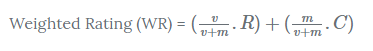

* v is the number of votes for the movie;
* m is the minimum votes required to be listed in the chart;
* R is the average rating of the movie; And
* C is the mean vote across the whole report

We already have v(vote_count) and R (vote_average) and C can be calculated as

## Dependencies

In [428]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

## Loading Denormalized Data

In [421]:
df = pd.read_csv('denormal_df.csv')

## Weighted Scoring

In [422]:
C = df['vote_average'].mean()
m = df['vote_count'].quantile(0.9)
q_movies = df.copy().loc[df['vote_count'] >= m]
C, m, q_movies.shape

(6.092171559442016, 1838.4000000000015, (481, 27))

In [423]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m) * R) + (m/(m+v) * C)

q_movies['score'] = q_movies.apply(weighted_rating, axis=1)
q_movies = q_movies.sort_values('score', ascending=False)
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(5)

title  vote_count  vote_average     score
1881  The Shawshank Redemption        8205           8.5  8.059258
662                 Fight Club        9413           8.3  7.939256
65             The Dark Knight       12002           8.2  7.920020
3232              Pulp Fiction        8428           8.3  7.904645
96                   Inception       13752           8.1  7.863239

## Similarity

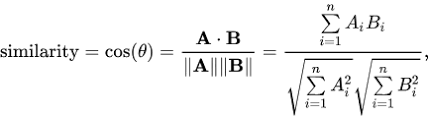


In [426]:
df['overview'].head()

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

In [429]:
df['overview'] = df['overview'].fillna('')

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['overview'])
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
indices = pd.Series(df.index, index=df['title']).drop_duplicates()

tfidf_matrix.shape

(4803, 20978)

## Content-Based Recommendation

In [431]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:6]
    movie_indices = [i[0] for i in sim_scores]
    movie_similarity = [i[1] for i in sim_scores]

    return pd.DataFrame(zip(df['title'].iloc[movie_indices], movie_similarity), columns=["title", "similarity"])

In [448]:
get_recommendations('The Godfather: Part II')

title  similarity
0             The Godfather    0.412329
1   The Godfather: Part III    0.259649
2  An American in Hollywood    0.121267
3       A Most Violent Year    0.111731
4                    Casino    0.110821

In [449]:
get_recommendations('The Avengers')

title  similarity
0  Avengers: Age of Ultron    0.146374
1                  Plastic    0.122791
2                  Timecop    0.110385
3       This Thing of Ours    0.107529
4    Thank You for Smoking    0.106203

In [451]:
get_recommendations('Pulp Fiction')

title  similarity
0       The Sting    0.132020
1  All or Nothing    0.114761
2   Sliding Doors    0.111997
3       Locker 13    0.111056
4     The Fighter    0.101718

## Content-Based Recommendation with More Features

In [438]:
features = ['cast', 'keywords', 'genres']
top_num = 5
for feature in features:
    df[feature] = df[feature].apply(lambda x: x[:top_num] if isinstance(x, list) else [])

In [439]:
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    elif isinstance(x, str):
        return str.lower(x.replace(" ", ""))
    else:
        return ''
    
features = ['cast', 'keywords', 'genres', 'director', "writer", "producer", "production_companies", "production_countries"]

for feature in features:
    df[feature] = df[feature].apply(clean_data)

In [440]:
def create_joined_features(x):
    return ' '.join([' '.join(x[f]) if isinstance(x[f], list) else str(x[f]) for f in features])

df["join_features"] = df.apply(create_joined_features, axis=1)

In [441]:
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df['join_features'])
cosine_sim2 = cosine_similarity(count_matrix, count_matrix)
df = df.reset_index()
indices = pd.Series(df.index, index=df['title'])

count_matrix.shape

(4803, 9999)

In [447]:
get_recommendations('The Godfather: Part II', cosine_sim2)

title  similarity
0         The Conversation    0.935414
1  The Godfather: Part III    0.857143
2         New York Stories    0.771517
3                    Twixt    0.771517
4            The Rainmaker    0.676123

In [446]:
get_recommendations('The Avengers', cosine_sim2)

title  similarity
0              Avengers: Age of Ultron    0.745356
1                           Iron Man 2    0.670820
2  Captain America: The Winter Soldier    0.670820
3                 Thor: The Dark World    0.670820
4                                 Thor    0.670820

In [450]:
get_recommendations('Pulp Fiction', cosine_sim2)

title  similarity
0     Kill Bill: Vol. 2    0.833333
1          Jackie Brown    0.816497
2     Kill Bill: Vol. 1    0.816497
3  Inglourious Basterds    0.589256
4            Four Rooms    0.577350

In [454]:
df.to_pickle("movies_df.pkl")
np.save("cosine_sim2.npy", cosine_sim2)
dump(count, "count_vectorizer.joblib")

['count_vectorizer.joblib']